# Homework #3



> Nathan Stenseng



In [ ]:
pip install pint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

# 1. Dionsaur

The “Splash” water park acquired the new “dinosaur” feature shown below. Water exits the “dinosaur” at a height $z_2 = 50$ m, with uniform velocity $V_2 = 10$ m/s. The area of the opening is $A_2 = 1$ m$^2$. Water enters the dinosaur at ground level, $z_1 = 0$ m, in a pipe with area $A_1 = 5$ m$^2$. Help the park engineer calculate:

a. What is the uniform velocity of the water at the dinosaur inflow, $V_1$?

b. What is the gage pressure at the dinosaur inflow, $p_1$?

Use $\rho = 1000$ kg/m$^3$ for the water density and $g = 10$ m/s$^2$ for the acceleration of gravity. Assume steady inviscid flow and uniform V1 and V2.

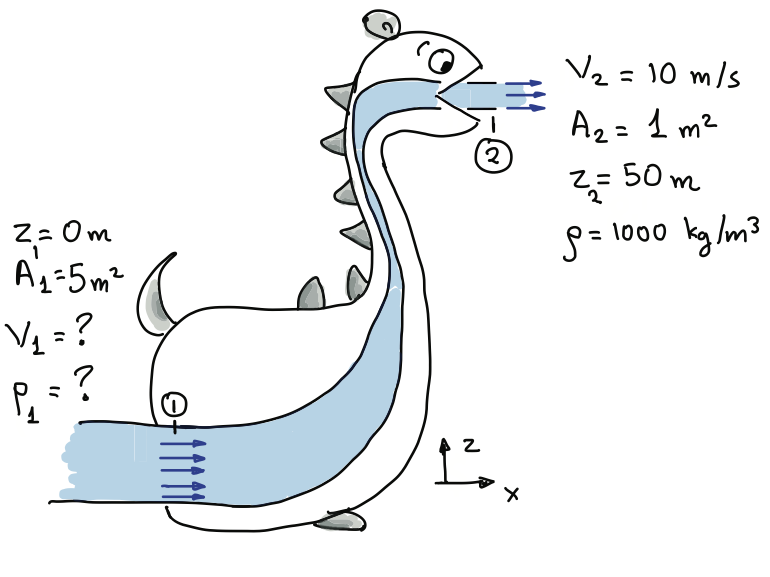

## Solution

There are two main equations we will use here. Our volumetric flow rate mass ballence:

$$\rho V_1A_1=\rho V_2A_2\tag{1}$$

and Bernoulli's equation:

$$p_1+\frac{1}{2}\rho V_1^2 +\rho g z_1 = p_2+\frac{1}{2}\rho V_2^2 +\rho g z_2\tag{2}$$

Rearranging equation 1 to make it solveable give:

$$V_1=\frac{V_2A_2}{A_1}$$

In [ ]:
V_2 = Q_(10,"m/s")
A_2 = Q_(1,"m^2")
A_1 = Q_(5,"m^2")

V_1 = V_2*A_2/A_1
print("V_1 =",V_1)

V_1 = 2.0 meter / second


Rearranging equation 2 gives our last quantity we are looking for, $p_1$:

$$p_1= p_2+\frac{1}{2}\rho V_2^2 +\rho g z_2 - \frac{1}{2}\rho V_1^2 -\rho g z_1$$

There is one value we don't know in this equation, $p_2$ but we can assume this has a gage pressure of 0 since it is open to the atmostphere. Subsituting in 0's gives:

$$p_1= \frac{1}{2}\rho V_2^2 +\rho g z_2 - \frac{1}{2}\rho V_1^2$$

In [ ]:
rho = Q_(1000,"kg/m^3")
g = Q_(10,"m/s^2")
z_2 = Q_(50,"m")

p_1 = 0.5*rho*V_2**2+rho*g*z_2-0.5*rho*V_1**2
print("p_1 = ",p_1.to("MPa").round(3))

p_1 =  0.548 megapascal


# 2. Captian Joe

In one of his Youtube videos (https://youtu.be/XuMtzqtjeEM), Captain Joe shows how to open his cockpit’s sliding window. He claims that pilots “physically can’t open the window in flight due to the differential cabin pressure”. The plane is flying with speed $V_{plane} = 100$ m/s and the velocity of the air outside the window is $V_w = 120$ m/s, see Figure 2. The cabin gage pressure is $p_{cabin} = 35,000$ Pa and the air density is $\rho = 1$ kg/m$^3$. Assume that the window is a trapezoid with the dimensions shown in the figure below. Is Captain Joe right? What is the required force to open the window in flight?



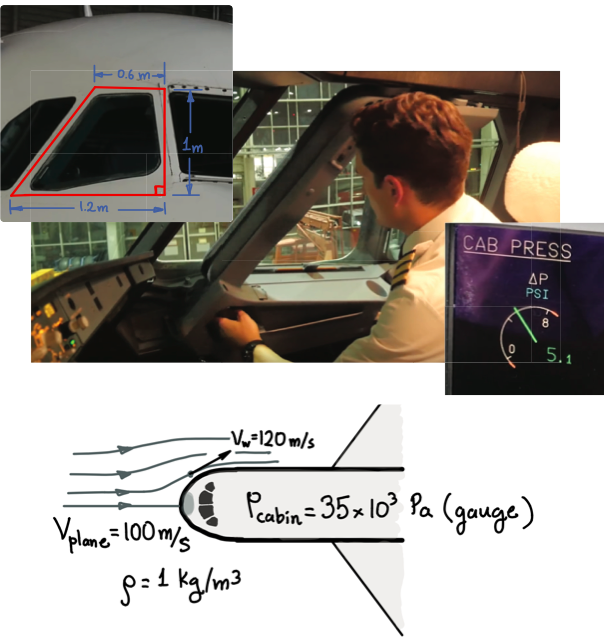

## Solution

We know that Bernoulli's equation can relate the air before it hits the window to after it hits the window.

$$p_1+\frac{1}{2}\rho V_1^2 +\rho g z_1 = p_2+\frac{1}{2}\rho V_2^2 +\rho g z_2$$

Where for our purposes, the pressure of the air on the window would be:

$$p_2 = p_1+\frac{1}{2}\rho V_1^2 - \frac{1}{2}\rho V_2^2$$

In [ ]:
p_1 = Q_(0, "Pa")
rho = Q_(1, "kg/m^3")
V_1 = Q_(100, "m/s")
V_2 = Q_(120, "m/s")
p_cabin = Q_(35000, "Pa")

p_2 = p_1+0.5*rho*V_1**2-0.5*rho*V_2**2
print("Air Pressure =",p_2.to("Pa").round(2))
p_tot = p_cabin - p_2
print("Total press =", p_tot)

Air Pressure = -2200.0 pascal
Total press = 37200.0 pascal


We also know that:

$$F=PA$$

In [ ]:
A = (0.5*(1.2+0.6)*1)*ureg.meter*ureg.meter

F = p_tot*A
print(F.to("kN").round(2))

33.48 kilonewton


#3. Ever Given

Even Given is one of the largest container ships in the world. On 23 March 2021, while traveling from Tanjung Pelepas in Malaysia to Rotterdam in the Netherlands, the ship ran aground in the Suez Canal (Figure 3). The ship remained in place for six days before salvage crews freed it on 29 March 2021. The accident and the canal blockage received a lot of news media attention. The prevailing public opinion is that the crew is responsible for the accident and many wondered how a ship crew can make such a huge unforced error. In this problem, we will demonstrate that Mr. Bernoulli has a lot to do with the accident and that he is mostly responsible for what happened. We will assume steady inviscid flow.
First, we will calculate the lateral force (in the y-axis direction) when the ship has a small deflection with angle θ with respect to the along-the-canal direction (x-axis). We will approximate the ship as a plane of zero thickness in the canal. The plane extends to the bottom of the canal as in the schematic of Figure 4. Ever Given is traveling at $V = 3$ m/s, and has length $L = 400$ m. The canal half width is $h = 60$ m and $d = 20$ m depth. Water density is $\rho = 1000$ kg/m$^3$. Assume that the flow is always uniform, that is, it only changes with $x$, and that the velocity vector is always aligned with $x$ (only $u$ component is present).

a. Calculate the force component in the y direction for a deflection angle $\theta = 2^o$. The pressure varies on the side of the ship, so to find the total force on a surface we need to integrate the pressure p over the surface as follows:

$$F=\int_{Area}p(x,z)dA$$

b. Does the force on the ship help the ship recover its along-the-canal direction or has a tendency to make the deflection worse? Please comment on the implications of navigating in narrow canals.

c. Make a plot of the force magnitude as a function of the deflection angle $\theta$ for $\theta$ in $0–9^o$. Please use a plotting program like Matlab or something similar. Your plot must be complete to receive full credit.

d. The shipping company’s chief engineer proposes to install a system on the ship to measure the differential pressure between the port and starboard sides. The company’s CFO says that the system and installation are expensive. Should the company acquire and install the instrument?

e. The chief engineer gets quotes for the system to measure differential pressure on the two sides of the ship. The pricing of the systems depends on the minimum absolute pressure difference that the system can measure, $p_{min}$. That is, the system cannot measure any difference < $p_{min}$. The price of system is $P = \frac{1000}{p_{min}}$. Which $p_{min}$ the chief engineer should select? You will get credit based on a reasonable justification. The justification must be quantitative, if possible.

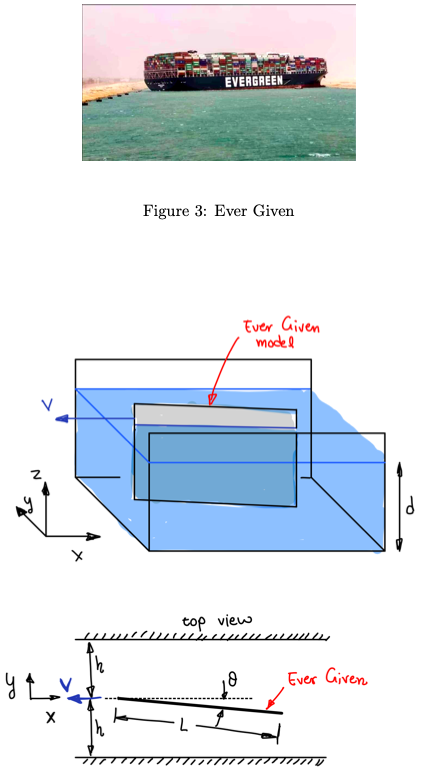

## Solution

### Part (a)

We can write the equation for $p(x,y)$ as:

$$p_o+\frac{1}{2}\rho V^2=p(x,z)+\frac{1}{2}\rho V^2(x,y)\tag{1}$$

This equation has too many variables but if we treat each section of the canal to the left and to the right of the ship as two seperate pipes we can say:

$$hV=(h-Lsin(\theta))V_f$$

as our final velocity for the flow to the left of our ship and:

$$hV=(h+Lsin(\theta))V_f$$.

as the final velocity for the flow to the right of our ship.

If we want to find $V(x)$, we can say that:

Left of ship:

$$hV=(h-xsin(\theta)V(x)$$

Right of ship:

$$hV=(h+xsin(\theta))V(x)$$

Writing it together as a function $V(x,y)$ gives:

$$
\begin{cases} 
      \frac{hV}{h+xsin(\theta)} & y > -xsin(\theta) \\
      \frac{hV}{h-xsin(\theta)} & y < -xsin(\theta)
  \end{cases}
$$

Now we can rearrange equation 1 to find:

For $y>-xsin(\theta)$, to the right of the ship:

$$p(x) = \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h+xsin(\theta)}\right)^2$$

For $y<-xsin(\theta)$, to the left of the ship:

$$p(x) = \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h-xsin(\theta)}\right)^2$$

Note here we assume $p_o=0$ gage pressure.

Now we can find the force: first to the right of the ship.

$$F_{right} = \int_0^{Lcos(\theta)} \int_{0}^{d}      \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h+xsin(\theta)}\right)^2      dzdx$$

$$F_{right} = \int_0^{Lcos(\theta)} \left(\left(      \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h+xsin(\theta)}\right)^2      \right)z\right)_{z=0}^{z=d}dx$$

$$F_{right} = \int_0^{Lcos(\theta)} \left(      \frac{1}{2}\rho d V^2 - \frac{1}{2}\rho d\left(\frac{hV}{h+xsin(\theta)}\right)^2      \right) dx$$

$$F_{right}=\left( \frac{1}{2}d\rho V^2x - \frac{1}{2}\rho dh^2V^2\left( \frac{-1}{sin(\theta)}\frac{1}{xsin(\theta)+h}\right)\right)_{x=0}^{x=Lcos(\theta)}$$


$$F_{right}=\left(   \frac{1}{2}\rho dV^2Lcos(\theta) - \frac{1}{2}\rho dh^2V^2\left( \frac{-1}{sin(\theta)}\frac{1}{Lcos(\theta)sin(\theta)+h}\right) + \frac{1}{2}\rho dh^2V^2\left( \frac{-1}{sin(\theta)}\frac{1}{h}\right)     \right)   $$

In [ ]:
d = Q_(20, "m")
V = Q_(3, "m/s")
h = Q_(60, "m")
rho = Q_(1000, "kg/m^3")
L = Q_(400, "m")


def F_right(x_1,x_2,theta):
  return 0.5*d*rho*V**2*x_2 - 0.5*d*rho*V**2*x_1 - 0.5*rho*d*h**2*V**2*(-1/np.sin(theta))*(1/(x_2*np.sin(theta)+h)) + 0.5*rho*d*h**2*V**2*(-1/np.sin(theta))*(1/(x_1*np.sin(theta)+h))

theta_1 = Q_(2, "degrees")
F = F_right(0*ureg.meters,L*np.cos(theta_1),theta_1)
print(F.to("MN").round(2))

6.79 meganewton


For the forces along the left side of the ship, we have:

$$F_{right} = \int_0^{Lcos(\theta)} \int_{0}^{d}      \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h-xsin(\theta)}\right)^2      dzdx$$

$$F_{right} = \int_0^{Lcos(\theta)} \left(\left(      \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h-xsin(\theta)}\right)^2      \right)z\right)_{z=0}^{z=d}dx$$

$$F_{right} = \int_0^{Lcos(\theta)} \left(      \frac{1}{2}\rho d V^2 - \frac{1}{2}\rho d\left(\frac{hV}{h-xsin(\theta)}\right)^2      \right) dx$$

$$F_{right}=\left( \frac{1}{2}d\rho V^2x - \frac{1}{2}\rho dh^2V^2\left( \frac{1}{sin(\theta)}\frac{1}{-xsin(\theta)+h}\right)\right)_{x=0}^{x=Lcos(\theta)}$$


$$F_{right}=\left(   \frac{1}{2}\rho dV^2Lcos(\theta) - \frac{1}{2}\rho dh^2V^2\left( \frac{1}{sin(\theta)}\frac{1}{-Lcos(\theta)sin(\theta)+h}\right) + \frac{1}{2}\rho dh^2V^2\left( \frac{1}{sin(\theta)}\frac{1}{h}\right)     \right)   $$

In [ ]:
def F_left(x_1,x_2,theta):
  return 0.5*d*rho*V**2*x_2 - 0.5*d*rho*V**2*x_1 - 0.5*rho*d*h**2*V**2*(1/np.sin(theta))*(1/(-x_2*np.sin(theta)+h)) + 0.5*rho*d*h**2*V**2*(1/np.sin(theta))*(1/(-x_1*np.sin(theta)+h))

F = F_left(0*ureg.meters,L*np.cos(theta_1),theta_1)
print(F.to("MN").round(2))

-10.9 meganewton


Here we have calculated that the force pushing the right side of the ship is 6.79 MegaNewtons but the force pushing the left side of the ship is -10.9 MegaNewtons. Now we can say the ship is being pulled on the left side. This means there is an overall forces pushing the ship to the right with a net values of 17.69 MegaNewtons.

### Part (b)

In order to calculate whether the forces along the ship makes the deflection worse or better, we can calculate the net forces on the front half of the ship verses the back half of the ship.

For the front of the ship:

$$F = F_{left}-F_{right}, \qquad(x=0,x=\frac{Lcos(\theta)}{2})$$

For the back half of the ship:

$$F = F_{left}-F_{right}, \qquad(x=\frac{Lcos(\theta)}{2},x=Lcos(\theta))$$

In [ ]:
Front_left = F_left(0*ureg.meters,L*np.cos(theta_1)/2,theta_1)
Front_right = F_right(0*ureg.meters,L*np.cos(theta_1)/2,theta_1)

Back_left = F_left(L*np.cos(theta_1)/2,L*np.cos(theta_1),theta_1)
Back_right = F_right(L*np.cos(theta_1)/2,L*np.cos(theta_1),theta_1)


print("F_front =", (Front_left-Front_right).to("MN").round(2))
print("F_back =", (Back_left-Back_right).to("MN").round(2))

F_front = -4.24 meganewton
F_back = -13.45 meganewton


Here we see that the net force on the front of the ship is 4.24 MegaNewtons to the left and the force on the back of the ship is 13.45 MegaNewtons to the left. This means that for an angle of $\theta=2^o$, the forces on the ship should actually cause the ship to rotate even more.

### Part (c)

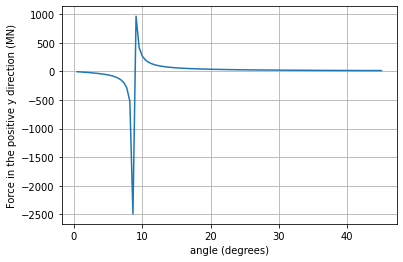

In [ ]:
theta_list = np.linspace(0,45,100)*ureg.degrees
F_list = np.zeros_like(theta_list)*ureg.MN

for i in range(len(theta_list)):
  F_list[i] = F_left(0*ureg.meters,L*np.cos(theta_1),theta_list[i]) - F_right(0*ureg.meters,L*np.cos(theta_1),theta_list[i])

plt.plot(theta_list,F_list)
plt.grid(True)
plt.xlabel("angle (degrees)")
plt.ylabel("Force in the positive y direction (MN)")
plt.show()

Here we see a large discontinuouty at around $\theta=9^o$. This makes sense though because at $\theta=9^o$, $Lcos(\theta)$ which is how far our ship would slide over, would be 62.5 meters. But with a canal that is only 60 meters, our equation is only valid for $Lcos(\theta)<60$.

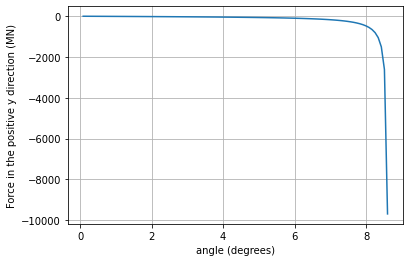

In [ ]:
theta_list = np.linspace(0,8.6,100)*ureg.degrees
F_list = np.zeros_like(theta_list)*ureg.MN

for i in range(len(theta_list)):
  F_list[i] = F_left(0*ureg.meters,L*np.cos(theta_1),theta_list[i]) - F_right(0*ureg.meters,L*np.cos(theta_1),theta_list[i])

plt.plot(theta_list,F_list)
plt.grid(True)
plt.xlabel("angle (degrees)")
plt.ylabel("Force in the positive y direction (MN)")
plt.show()

Looking at this smaller range, we see that $F_{left}-F_{right}$ is getting continously more negative. Which means that our ship will continue to be pushed on the right side (to the left) more and more for each degree it changes. This is why we can say Mr. Bernoulli is to blame for our ship crashing. Because the forces are in a positive feedback look with the ships angular displacement. A larger $\theta$ means a larger force.

### Part (d) and Part (e)

I believe the sensor is unnecessary. The forces start to grow out of control, $\theta=6^o$. We can determine the angle of the ship visibly using the following equation:

$$n = h-Lcos(\theta)$$

Where $n$ is the distance the ship is away from the canal. For the ship being 30 meters away from the canal, therefore being twice as close in the back verses in the front which I consider to be a reasonable distance to notices visually, the angle would only be $4.3^o$ which looking at our graph from part c, would not yet be a significant pushing force and can still be corrected. 

If we then deduce that the minimum perceivable angular deflection is $4.3^o$. The sensor will only be useful for $\theta<4.3^o$. The pressure differential for $\theta=4.3^o$ would be: $$p(Lcos(\theta)) = \frac{1}{2}\rho V^2 - \frac{1}{2}\rho\left(\frac{hV}{h-Lcos(\theta)sin(\theta)}\right)^2$$

In [ ]:
theta_1 = Q_(4.3, "degrees")

p = (0.5*rho*V**2 - 0.5*rho*h**2*V**2*(1/(-L*np.cos(theta_1)*np.sin(theta_1)+h))**2)

print(p.to("kPa").round(2))

-13.39 kilopascal


Therefore I would choose a $p_{min}$ of 13.39 kPa because any greater pressure would cause the turn of the ship to 